In [1]:
from google.colab import files
uploaded = files.upload()

!pip install pandas numpy matplotlib seaborn nltk textblob wordcloud

Saving twitter_validation.csv to twitter_validation.csv


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Column names:
Index(['3364', 'Facebook', 'Irrelevant',
       'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'],
      dtype='object')

Sentiment Distribution:
sentiment_category
Positive    461
Negative    325
Neutral     213
Name: count, dtype: int64


<ipython-input-2-eaf0943035d6>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment_category', palette='viridis')


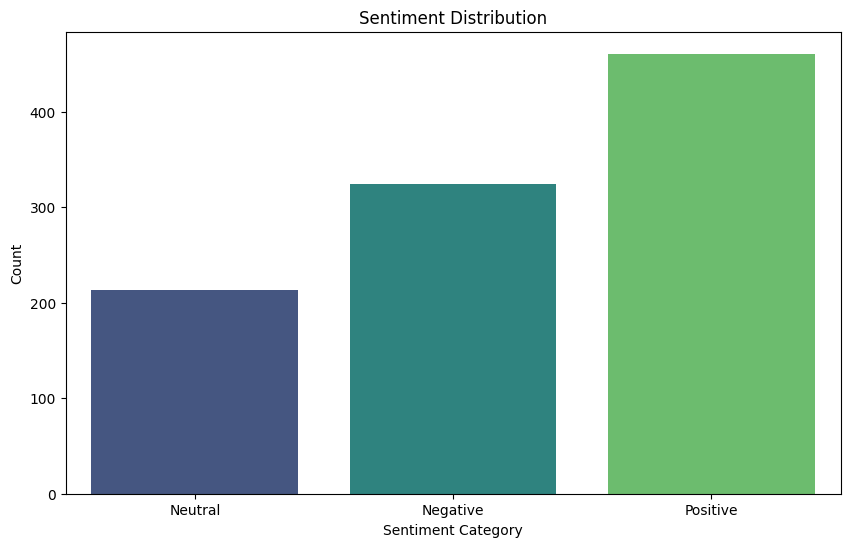

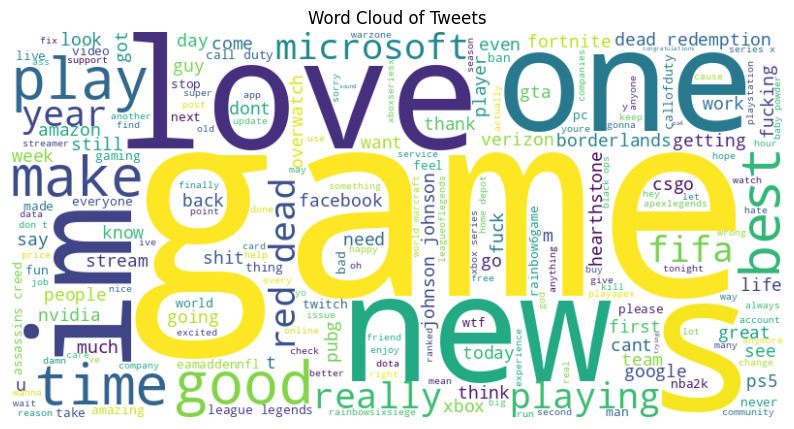

In [2]:
# Install necessary libraries
!pip install pandas numpy matplotlib seaborn nltk textblob wordcloud

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string

# Download stopwords
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('twitter_validation.csv')  # Ensure the file name is correct

# Print column names to find the correct column for text data
print("Column names:")
print(df.columns)

# Define column names based on the output
text_column = 'I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣'

# Define a function to clean text
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = ''.join([c for c in text if c not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  # Remove stopwords
    return text

# Apply cleaning to the text column
df['cleaned_text'] = df[text_column].apply(clean_text)

# Define a function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['sentiment'] = df['cleaned_text'].apply(get_sentiment)

# Categorize sentiment as Positive, Negative, or Neutral
df['sentiment_category'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Display sentiment counts
print("\nSentiment Distribution:")
print(df['sentiment_category'].value_counts())

# Bar plot of sentiment categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment_category', palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()

# Generate a word cloud
text = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tweets')
plt.show()
